In [1]:
# 2023-12
# experiments in jigsaw puzzle shapes from physics sims
# very WIP

In [439]:
import numpy as np
import matplotlib.pyplot as plt
import torch as t
from einops import rearrange, repeat, reduce, einsum

In [4]:
indices = np.arange(100)

In [30]:
n = 100
pts = np.zeros([n, 2])
pts[:, 0] = np.arange(n)

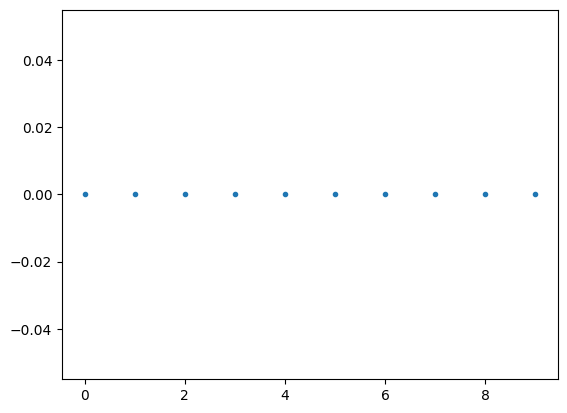

In [29]:
plt.plot(pts[:, 0], pts[:, 1], '.')

In [443]:
def U(i, j, pos):
    if i == j:
        return 0.
    elif i == j+1 or i == j-1:
        return U_neighbor(pos[i], pos[j])
    else:
        return U_stranger(pos[i], pos[j])
    
def U_neighbor(pos1, pos2):
    return 1000 * U_pairwise(pos1, pos2, 3/n)
    
def U_stranger(pos1, pos2):
    return 0.1 * U_pairwise(pos1, pos2, 30/n, rang=0.1)

def U_pairwise(pos1, pos2, target, rang=100):
    dist2 = t.sum((pos1-pos2)**2)
    #print(t.sqrt(dist2), target)
    return (t.sqrt(dist2) - target)**2 * t.exp(-dist2 / rang**2)

def U_vectorized(pos):
    dist2 = reduce((rearrange(pos, 'n p -> n 1 p') - rearrange(pos, 'n p -> 1 n p'))**2, 'n m p -> n m', 'sum')
    strangers = (t.sqrt(dist2) - 3/n)**2 * t.exp(-dist2 / 0.1**2)
    neighbors = t.diagonal(dist2, offset=1)

In [449]:
t.diagonal(t.eye(5), offset=1)

tensor([0., 0., 0., 0.])

In [444]:
U_vectorized(pts)

tensor([[0.0000, 0.0036, 0.0141,  ..., 0.9754, 0.9840, 1.0000],
        [0.0036, 0.0000, 0.0034,  ..., 0.9738, 0.9753, 0.9841],
        [0.0141, 0.0034, 0.0000,  ..., 0.9790, 0.9738, 0.9754],
        ...,
        [0.9754, 0.9738, 0.9790,  ..., 0.0000, 0.0034, 0.0141],
        [0.9840, 0.9753, 0.9738,  ..., 0.0034, 0.0000, 0.0036],
        [1.0000, 0.9841, 0.9754,  ..., 0.0141, 0.0036, 0.0000]],
       grad_fn=<ReshapeAliasBackward0>)

In [430]:
def grad_step(pts, opt):
    E = sum([U(i, j, pts) for i in range(n) for j in range(i)])
    print(E)
    E.backward()
    opt.step()
    
    pts.requires_grad_(False)
    pts[0] = t.tensor([0., 0.])
    pts[-1] = t.tensor([1., 0])
    pts.requires_grad_(True)
    
    opt.zero_grad()
    

In [431]:
n = 100

pts = t.zeros([n, 2])
pts[:, 0] = t.linspace(0, 1, n)
pts[:, 1] = t.sin(t.linspace(0, 2*np.pi, n))

pts.requires_grad_()

opt = t.optim.SGD([pts], lr=3e-4)

In [432]:
dots0 = pts.detach().numpy().copy()

In [433]:
qplot = lambda dots: plt.plot(dots[:, 0], dots[:, 1], '.-')

In [434]:
for step in range(30):
    print(step)
    grad_step(pts, opt)

0
tensor(48.0174, grad_fn=<AddBackward0>)
1
tensor(46.7916, grad_fn=<AddBackward0>)
2
tensor(45.6071, grad_fn=<AddBackward0>)
3
tensor(44.4803, grad_fn=<AddBackward0>)
4
tensor(43.4375, grad_fn=<AddBackward0>)
5
tensor(42.4875, grad_fn=<AddBackward0>)
6
tensor(41.6038, grad_fn=<AddBackward0>)
7
tensor(40.7656, grad_fn=<AddBackward0>)
8
tensor(40.0259, grad_fn=<AddBackward0>)
9
tensor(39.4314, grad_fn=<AddBackward0>)
10
tensor(38.9303, grad_fn=<AddBackward0>)
11
tensor(38.4829, grad_fn=<AddBackward0>)
12
tensor(38.0747, grad_fn=<AddBackward0>)
13
tensor(37.6976, grad_fn=<AddBackward0>)
14
tensor(37.3447, grad_fn=<AddBackward0>)
15
tensor(37.0102, grad_fn=<AddBackward0>)
16
tensor(36.6897, grad_fn=<AddBackward0>)
17
tensor(36.3802, grad_fn=<AddBackward0>)
18
tensor(36.0799, grad_fn=<AddBackward0>)
19
tensor(35.7873, grad_fn=<AddBackward0>)
20
tensor(35.5016, grad_fn=<AddBackward0>)
21
tensor(35.2221, grad_fn=<AddBackward0>)
22
tensor(34.9485, grad_fn=<AddBackward0>)
23
tensor(34.6803, gr

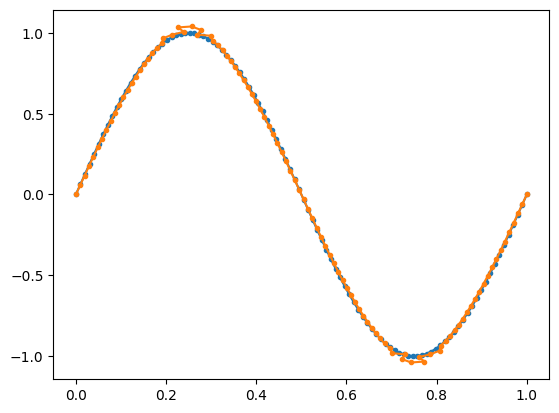

In [435]:
dots = pts.detach().numpy()
qplot(dots0)
#qplot(dots1)
qplot(dots)